In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px

In [15]:

df = pd.read_csv("../data/benin_raw.csv", parse_dates=["Timestamp"], encoding="latin1")
df.head()

/var/folders/pp/3nx806hs7bl388g7c6clvc5h0000gn/T/ipykernel_34108/2986844133.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/benin_raw.csv", parse_dates=["Timestamp"], encoding="latin1")
/var/folders/pp/3nx806hs7bl388g7c6clvc5h0000gn/T/ipykernel_34108/2986844133.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("../data/benin_raw.csv", parse_dates=["Timestamp"], encoding="latin1")


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,yyyy-mm-dd hh:mm,W/m²,W/m²,W/m²,W/m²,W/m²,°C,%,m/s,m/s,m/s,°N (to east),°,hPa,1 or 0,mm/min,°C,°C,NaN
1,2021-08-09 00:01,-1.2,-0.2,-1.1,0,0,26.2,93.4,0,0.4,0.1,122.1,0,998,0,0,26.3,26.2,NaN
2,2021-08-09 00:02,-1.1,-0.2,-1.1,0,0,26.2,93.6,0,0,0,0,0,998,0,0,26.3,26.2,NaN
3,2021-08-09 00:03,-1.1,-0.2,-1.1,0,0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0,26.4,26.2,NaN
4,2021-08-09 00:04,-1.1,-0.1,-1,0,0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0,26.4,26.3,NaN


In [16]:
# Overview of numeric columns
df.describe()


,Comments
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [17]:

# Count of missing values in each column
missing_report = df.isna().sum()

# Show only columns with missing values
missing_report[missing_report > 0].sort_values(ascending=False)

Comments    525601
dtype: int64

In [18]:
# Percentage of missing values per column
missing_percent = (df.isna().sum() / len(df)) * 100

# Show only columns with > 0% missing
missing_percent[missing_percent > 0].sort_values(ascending=False)


Comments    100.0
dtype: float64

In [19]:
df = df.drop(columns=["Comments"])


In [20]:
from scipy.stats import zscore

z_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores for each of the key numeric columns
# Ensure all relevant columns are numeric (ignore errors and convert invalid strings to NaN)
df[z_cols] = df[z_cols].apply(pd.to_numeric, errors='coerce')

z_scores = df[z_cols].apply(zscore)

# Mark rows as outliers where absolute Z-score > 3
outliers = (np.abs(z_scores) > 3)

# Count of outliers per column
outlier_count = outliers.sum().sort_values(ascending=False)
outlier_count


GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64

In [21]:
df_clean = df.dropna(subset=['GHI', 'DNI', 'DHI', 'ModA', 'ModB'])



In [22]:
df_clean = df_clean.fillna(df_clean.median(numeric_only=True))


In [23]:
df_clean.to_csv("../data/benin_clean.csv", index=False)


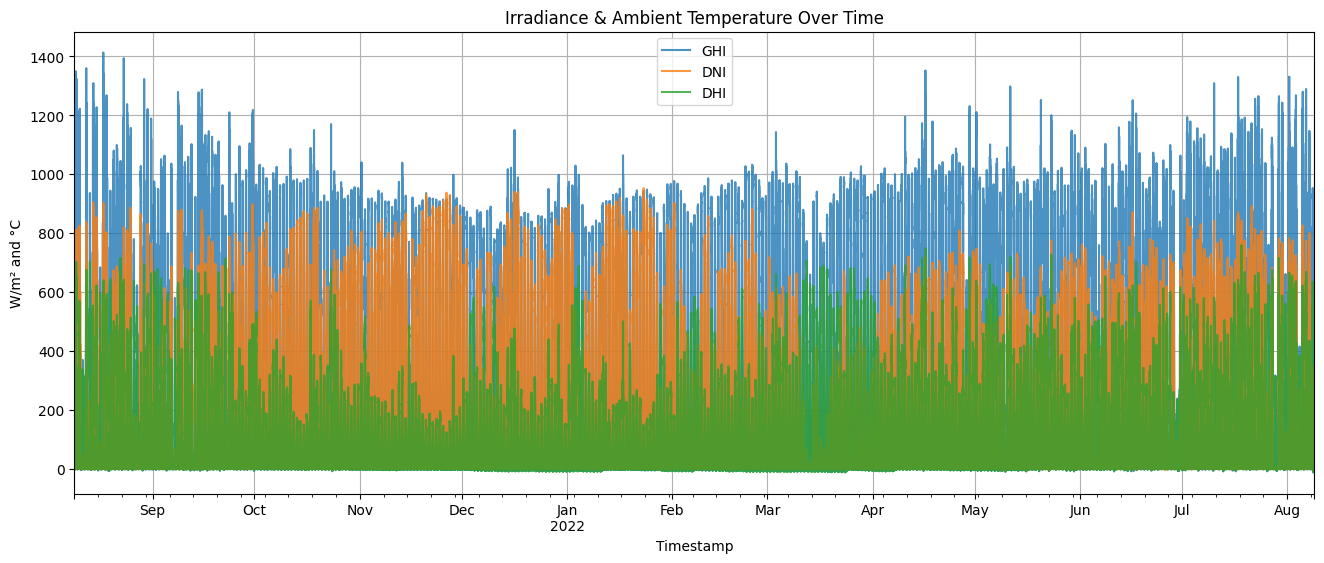

In [24]:
# Set Timestamp as index for plotting
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
df_clean = df_clean.sort_values("Timestamp")
df_clean.set_index("Timestamp", inplace=True)

# Plot GHI, DNI, DHI, Tamb over time
df_clean[["GHI", "DNI", "DHI", "Tamb"]].plot(figsize=(16, 6), alpha=0.8)
plt.title("Irradiance & Ambient Temperature Over Time")
plt.ylabel("W/m² and °C")
plt.xlabel("Timestamp")
plt.grid(True)
plt.show()


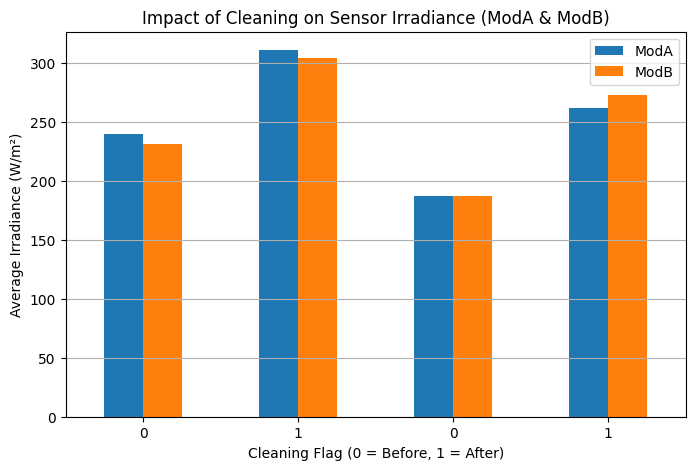

In [25]:
# Group by cleaning flag and calculate mean irradiance for ModA and ModB
cleaning_impact = df_clean.groupby("Cleaning")[["ModA", "ModB"]].mean()

# Plot
cleaning_impact.plot(kind="bar", figsize=(8, 5), legend=True)
plt.title("Impact of Cleaning on Sensor Irradiance (ModA & ModB)")
plt.ylabel("Average Irradiance (W/m²)")
plt.xlabel("Cleaning Flag (0 = Before, 1 = After)")
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()


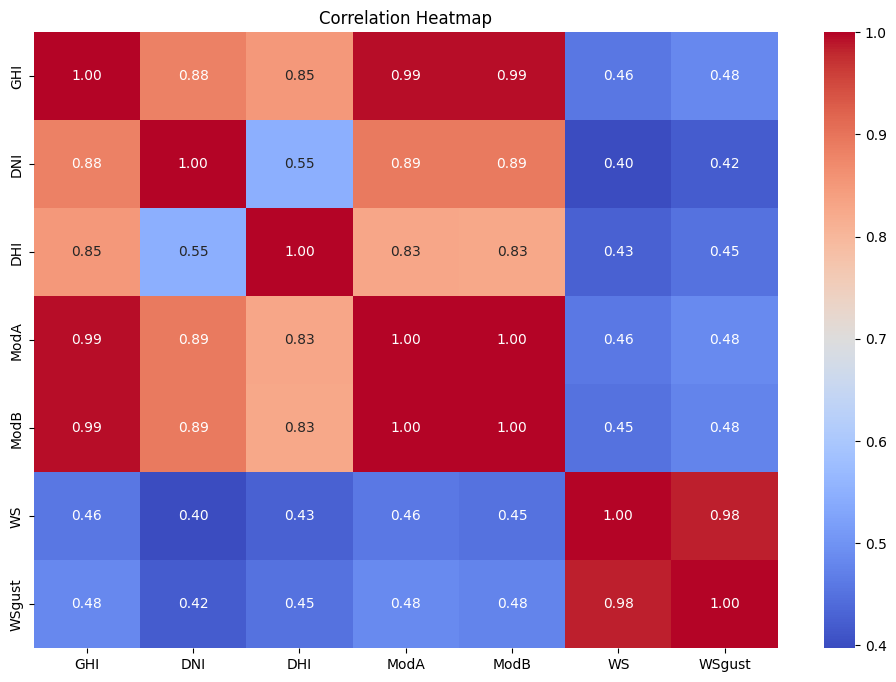

In [26]:
# Correlation heatmap of all numeric variables
plt.figure(figsize=(12, 8))
corr_matrix = df_clean.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
